## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [311]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [312]:
data = pd.read_csv("https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv", sep=',')
data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [313]:
data.tail()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


In [314]:
data.shape

(1000, 21)

### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [315]:
data.isnull().sum() # везде 0 => NaN'ов в таблице нет

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [316]:
data.other_debtors.unique()

array(['none', 'guarantor', 'co-applicant'], dtype=object)

Количественные признаки:
*   duration
*   amount
*   age 
 
Бинарные признаки (т.к. принимают всего 2 значения):
*   telephone
*   foreign_worker
*   people_liable

Порядковые признаки:
*   status - можно сравнивать клиентов по размеру их счета (чтобы понимать, например, на какую сумму и под какой процент можно выдать кредит, чтобы клиент его потянул) 
*   savings - можно сравнивать клиентов по размеру их накоплений (чтобы оценить, например, финансовую "подушку безопасности" клиента) 
*   employment_duration - можно сравнивать клиентов по времени работы (чтобы оценить, например, шанс того, что клиент лишится работы и не сможет платить по кредиту) 
*   installment_rate - можно сравнивать клиентов по размеру разовой выплаты (чем она больше, тем быстрее клиент закроет кредит (это надежнее для банка), например; с другой стороны, чем меньше выплата, тем больше денег получает банк за счет начисления процентов по кредиту)  
*   present_residence - можно сравнивать клиентов по продолжиттельности их гражданства (чем дольше гражданство, тем клиент надежнее (как в жизни оценивают))
*   number_credits - можно сравнивать клиентов по количеству открытых кредитов в этом банке (чтобы понимать, например, финансовую нагрузку на клиента и оценивать, потянет ли он еще кредит)

Все признаки, отнесенные к порядковым, позволяют в той или иной мере оценить клиента и его надежность в вопросе выдачи кредита

Категориальные признаки:
*   credit_history - непонятно, как соотносить разные категории, чтобы задать операции сравнения (что больше: "existing credits paid back duly till now" или "no credits taken/all credits paid back duly", например)
*   purpose - бессмысленно сравнивать клиентов по их целям
*   personal_status_sex - непонятно, как соотносить разные категории, чтобы задать операции сравнения (чем категория "разведенный мужчина" отличается от категории "одинокий мужчина", например)  
*   other_debtors - непонятно, как соотносить разные категории, чтобы задать операции сравнения (что больше: "guarantor" или "co-applicant") 
*   property - непонятно, как соотносить разные категории, чтобы задать операции сравнения (может быть, у кого-то самая дорогая собственность - машина за десятки миллионов, а у кого-то дом, но гораздо дешевле)      
*   other_installment_plans - непонятно, как соотносить разные категории, чтобы задать операции сравнения (что больше: "bank" или "stores" - можно в магазине взять рассрочку на дорогущую машину, а в банке небольшой кредит)   
*   housing - непонятно, как соотносить разные категории, чтобы задать операции сравнения (что больше: "own" или "rent")
*   job - непонятно, как соотносить разные категории, чтобы задать операции сравнения (что больше: 'skilled employee/official' или 'manager/self-empl./highly qualif. employee')

credit_risk - целевая переменная, а не признак, поэтому никуда ее не включил  


### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [317]:
data.groupby('purpose').amount.mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [318]:
print(f"Процент клиентов моложе 30 лет, снимающих жилье - {data[(data.age < 30) & (data.housing == 'rent')].shape[0] / data[data.age < 30].shape[0] * 100} %")
print(f"Процент клиентов старше 40 лет, снимающих жилье - {data[(data.age > 40) & (data.housing == 'rent')].shape[0] / data[data.age > 40].shape[0] * 100} %")

Процент клиентов моложе 30 лет, снимающих жилье - 66.66666666666666 %
Процент клиентов старше 40 лет, снимающих жилье - 68.01470588235294 %


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [319]:
data.number_credits.unique()

array(['1', '2-3', '4-5', '>= 6'], dtype=object)

In [320]:
data[(data.foreign_worker == 'yes') & ((data.number_credits == '4-5') | (data.number_credits == '>=6'))].shape[0]

1

### Задание 6 (1 балл)

In [321]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

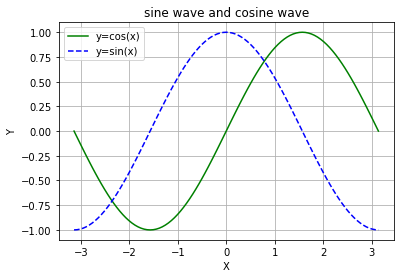

In [322]:
x = np.arange(-np.pi, np.pi + np.pi/50, np.pi/50)
plt.plot(x, np.sin(x), c='g')
plt.plot(x, np.cos(x), linestyle='dashed', c='b')
plt.grid(True)
plt.legend(labels = {'y=sin(x)', 'y=cos(x)'}, loc='best')
plt.ylabel('Y')
plt.xlabel('X')
plt.title('sine wave and cosine wave')
plt.show()

*Комментарий:* построил графики синусоиды и косинусоиды

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

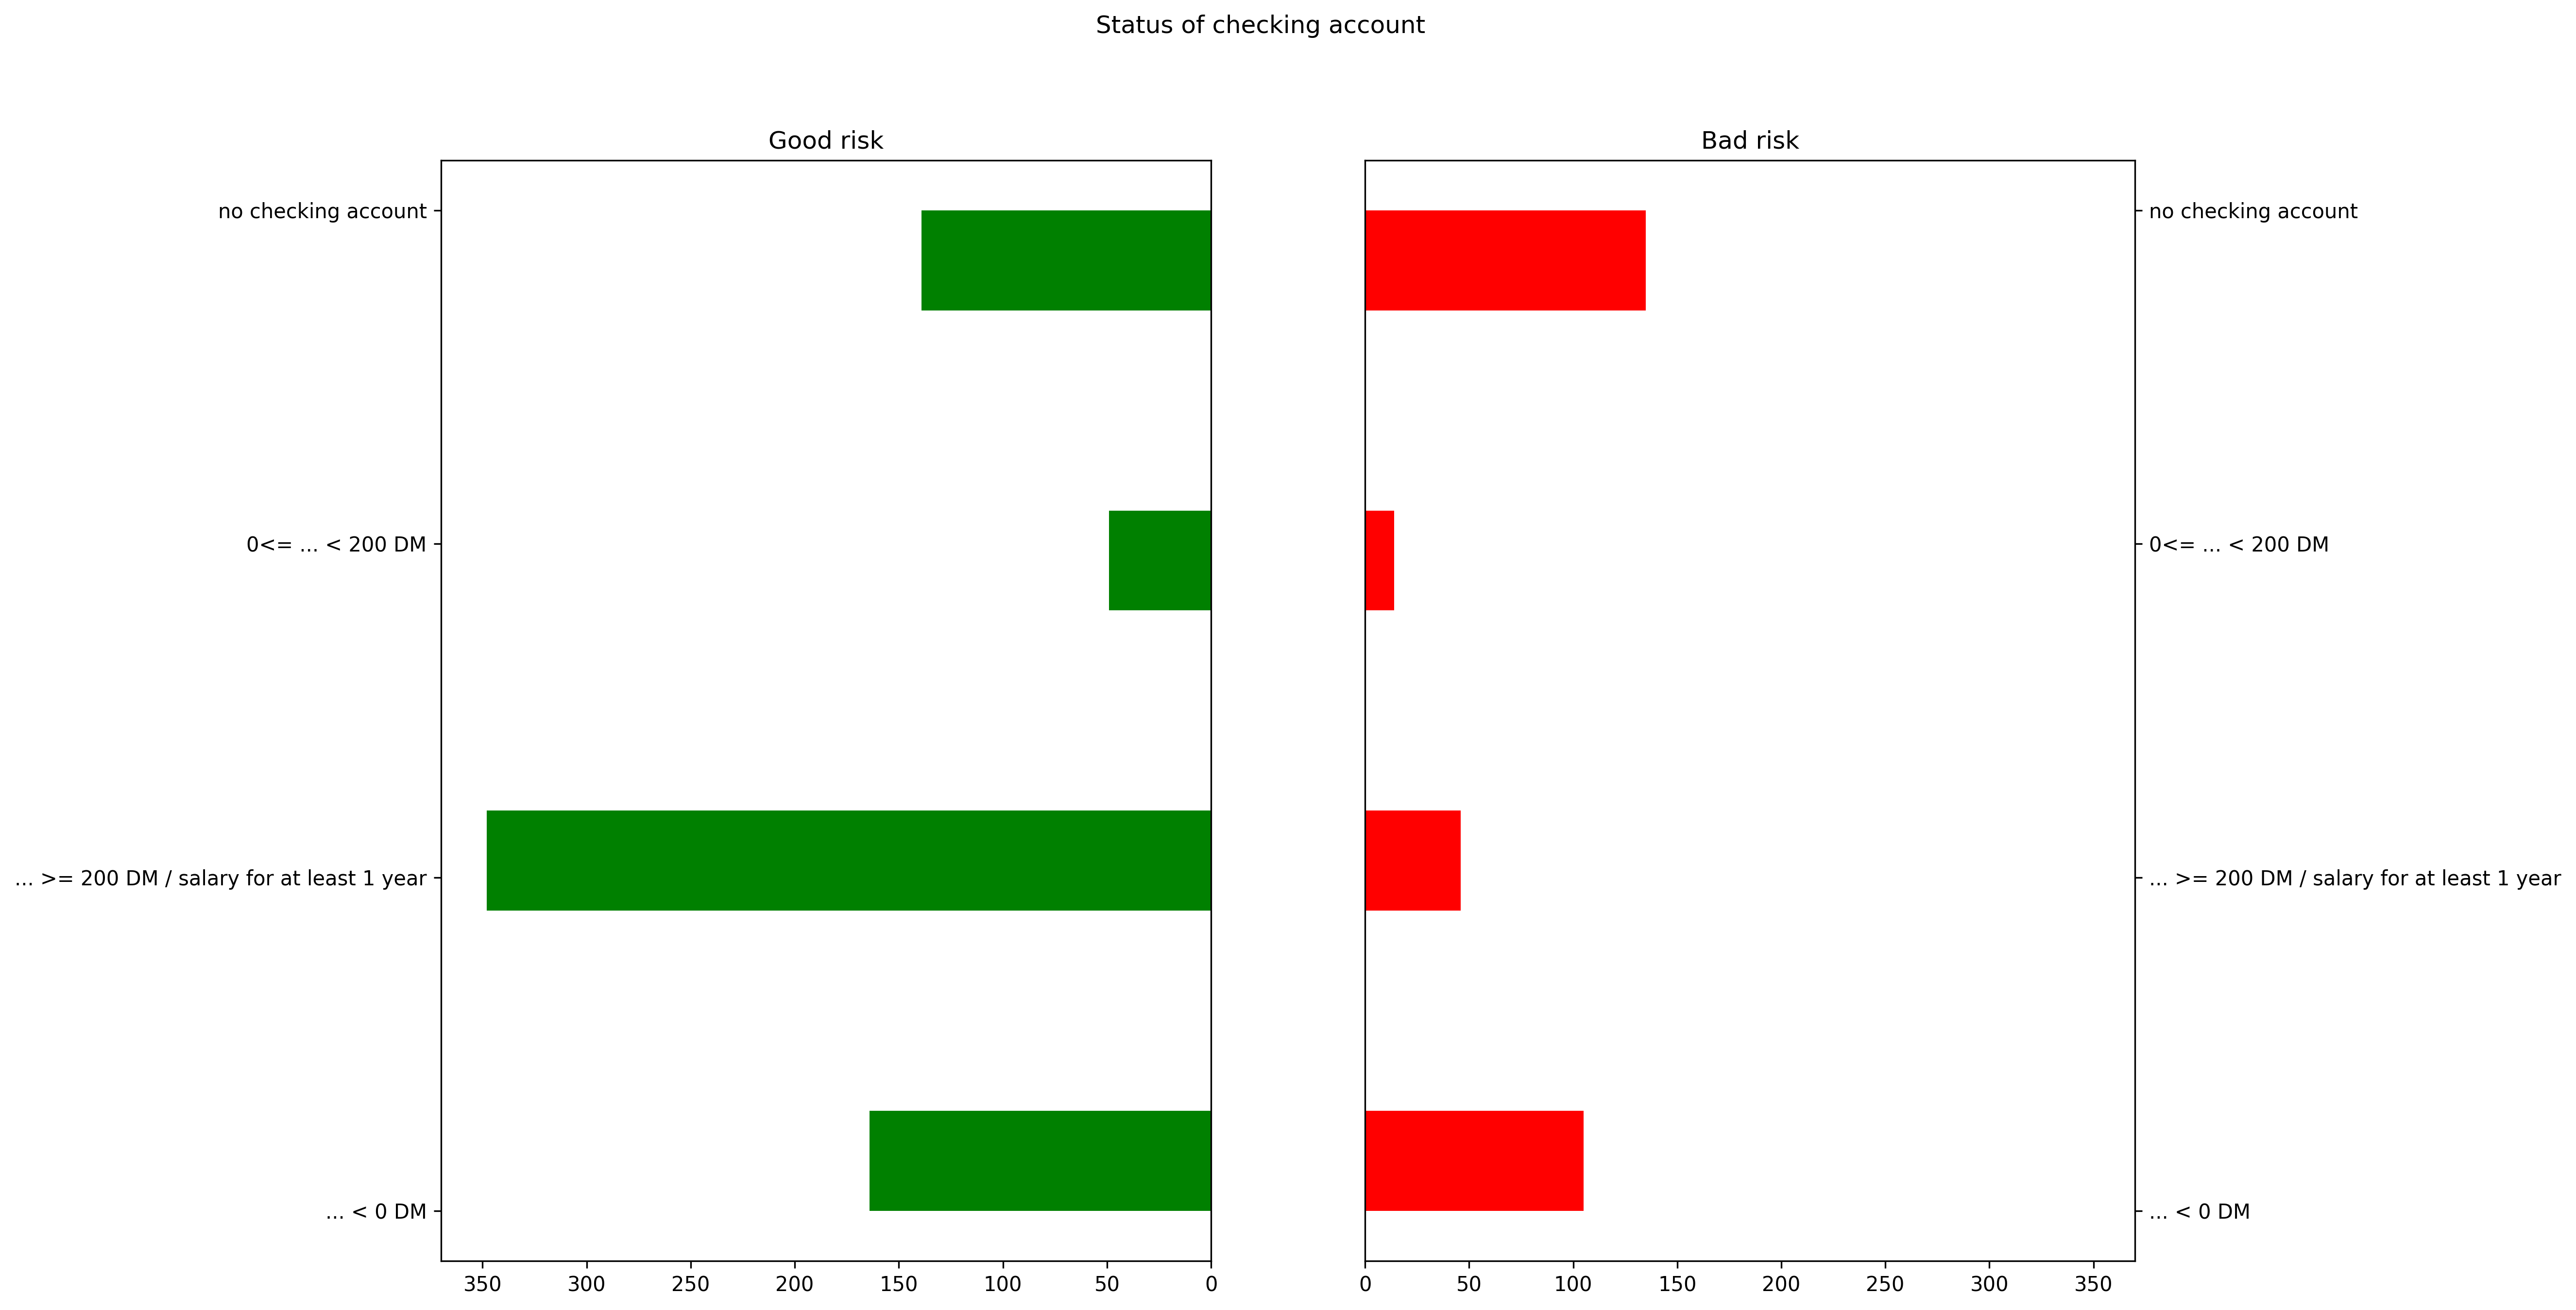

In [331]:
plt.figure(figsize=(15, 10), dpi=300)
plt.suptitle("Status of checking account")
plt.subplot(1, 2, 1)
plt.title('Good risk')
plt.hist(sorted(data[data['credit_risk'] == 'good']['status']), orientation='horizontal', color='g')
plt.gca().invert_xaxis() 
plt.xlim (370, 0)
plt.subplot(1, 2, 2)
plt.title('Bad risk')
plt.hist(sorted(data[data['credit_risk'] == 'bad']['status']), orientation='horizontal', color='r')
plt.tick_params(axis='y', labelleft=False, labelright=True, right=True, left=False)
plt.xlim (0, 370)
plt.show()

*Комментарий:* видим, что при любом значении status количество положительных кейсов больше, чем отрицательных; наибольшая разность при status = '...>= 200 DM / salary for at least 1 year', также больше всего людей имеют данное значение status

### Задание 8  (0.5 балла)

In [293]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

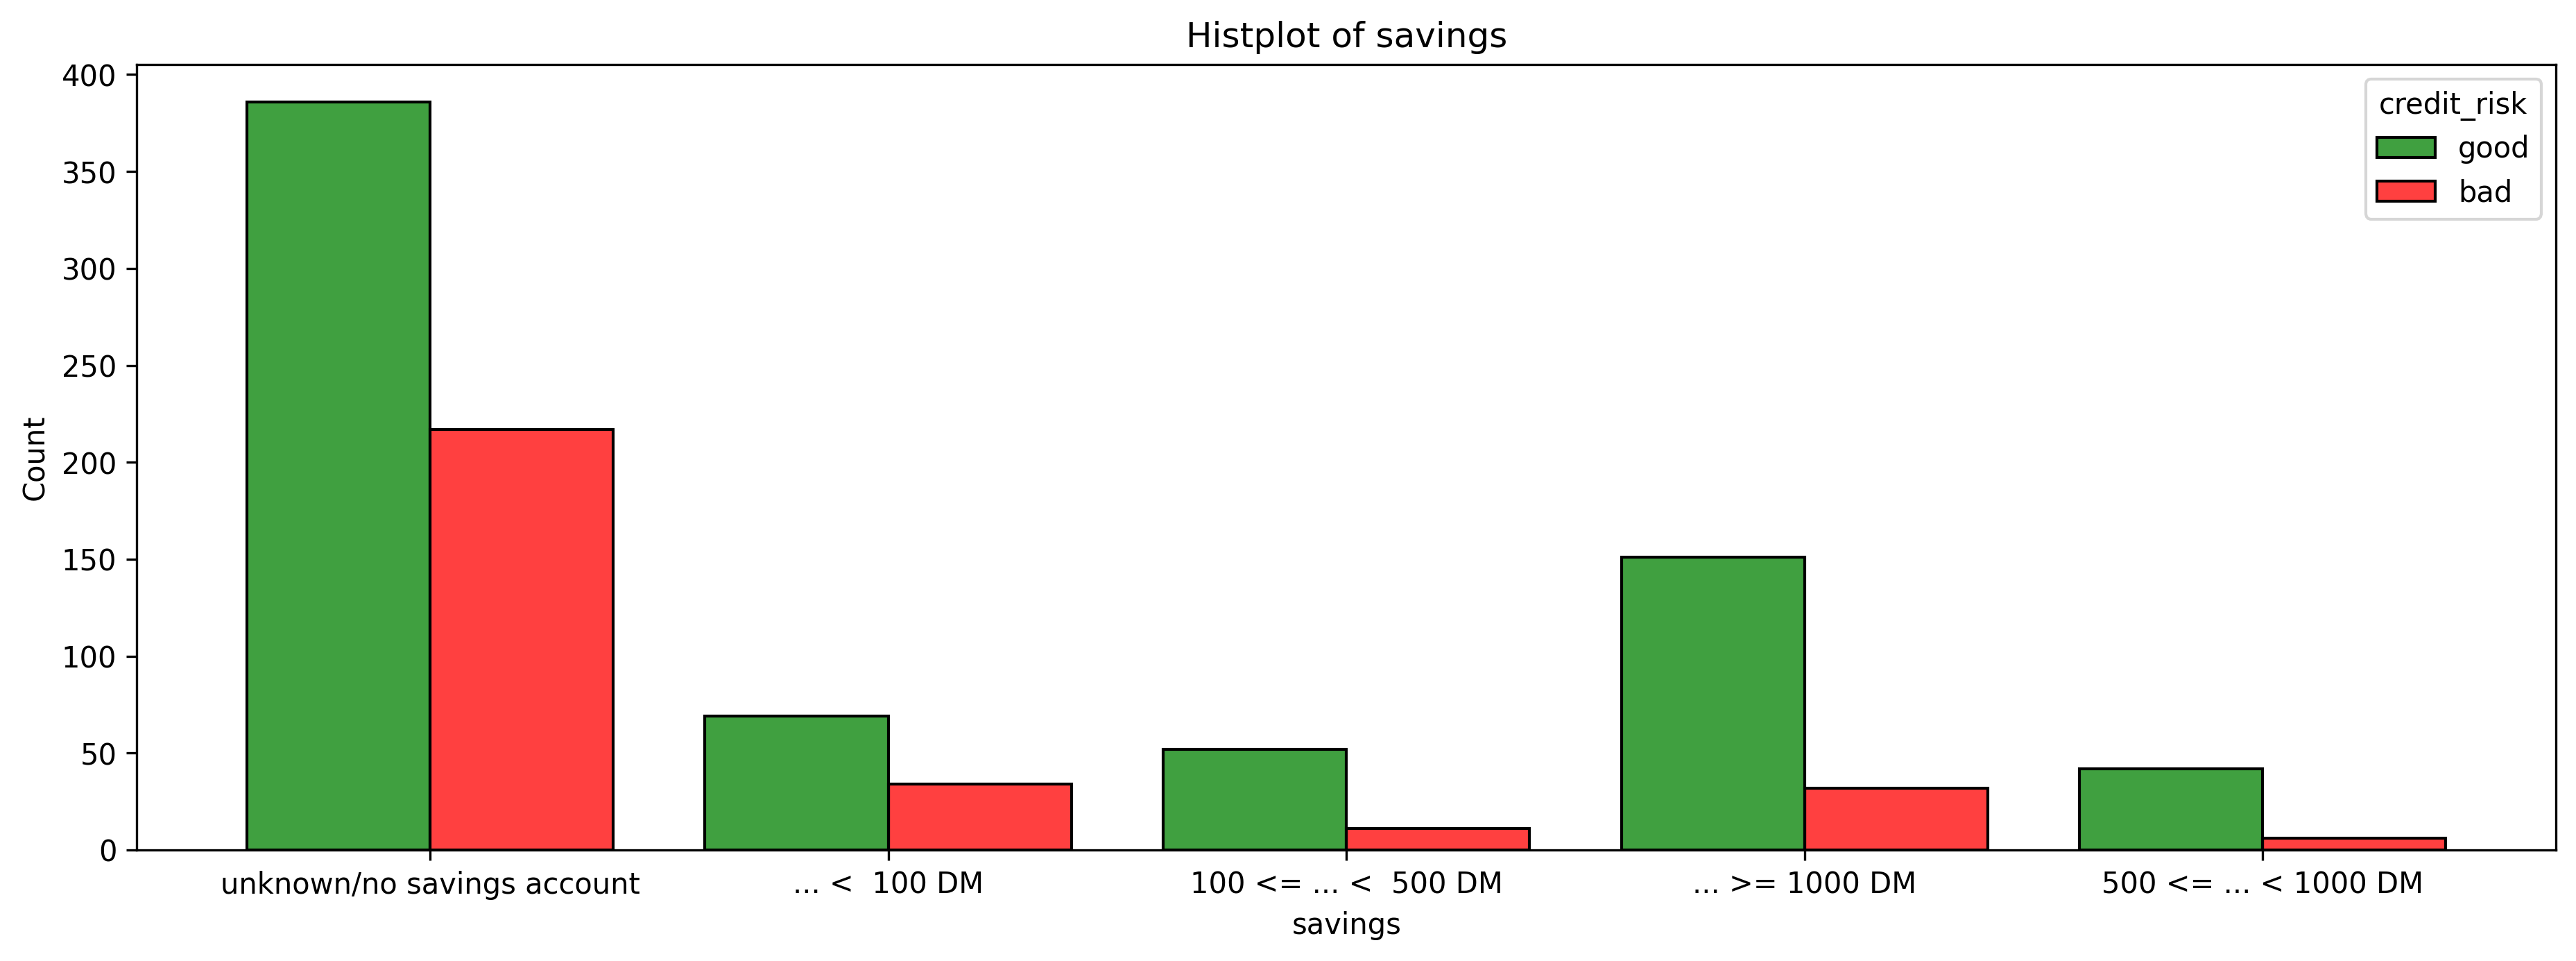

In [333]:
plt.figure(figsize=(15, 5), dpi=300)
sns.histplot(data, x='savings', hue='credit_risk', multiple='dodge', shrink=.8, palette=sns.color_palette(['g', 'r']))
plt.title('Histplot of savings')
plt.show()

*Комментарий:* видим, что при любом значении savings количество положительных кейсов больше, чем отрицательных; также больше всего людей, не имеющих сбережений

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

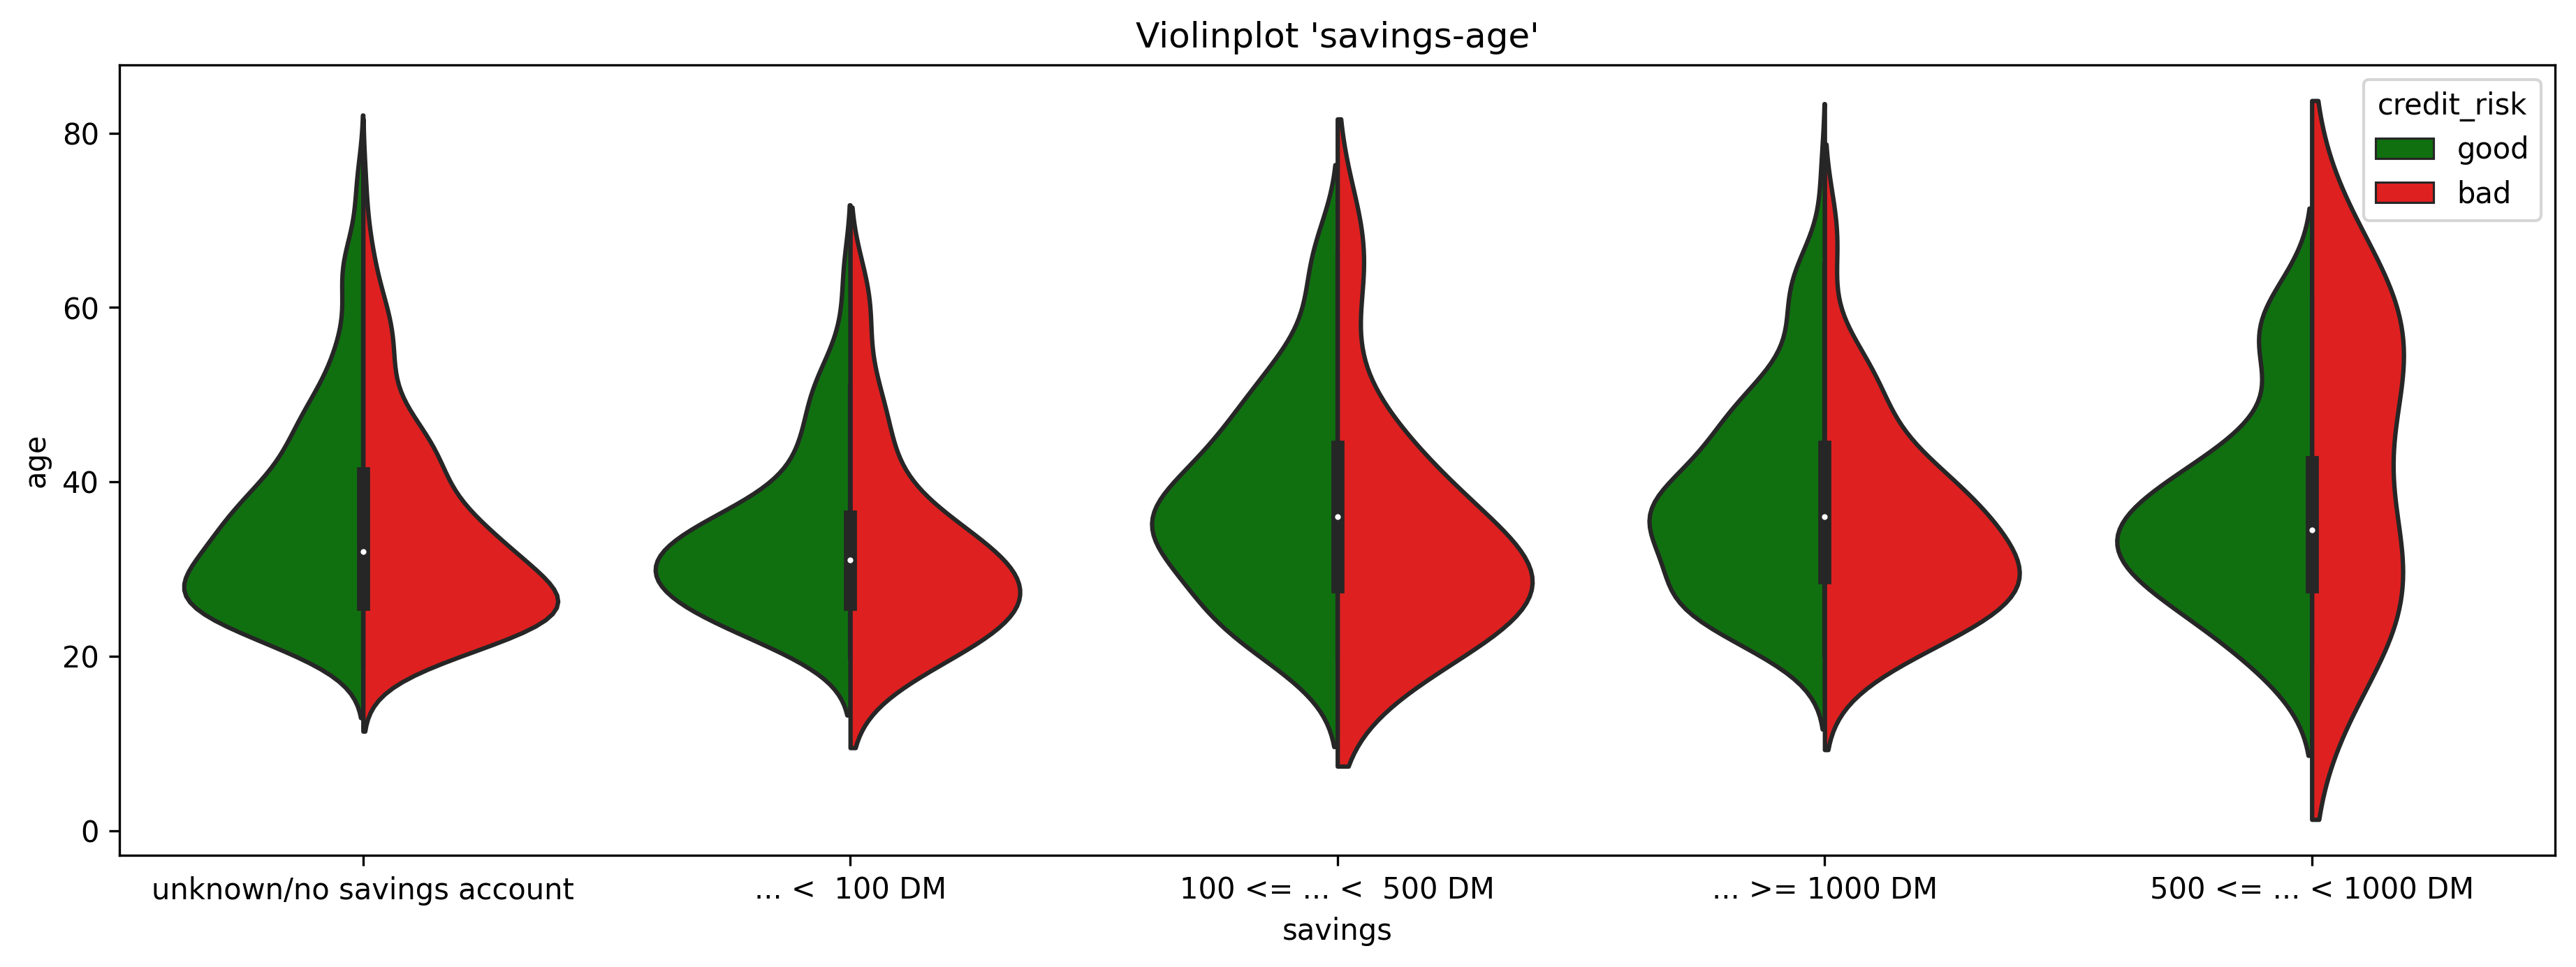

In [334]:
plt.figure(figsize=(15, 5), dpi=300)
sns.violinplot(data=data, x='savings', y='age', hue='credit_risk', split=True, palette=sns.color_palette(['g', 'r']))
plt.title("Violinplot 'savings-age'")
plt.show()

*Комментарий:* видим, что медианы для всех значений savings находятся примерно на одном уровне между 20 и 40 годами; пики частотности для положительных рисков, как правило, выше по оси Y, чем для отрицательных 

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

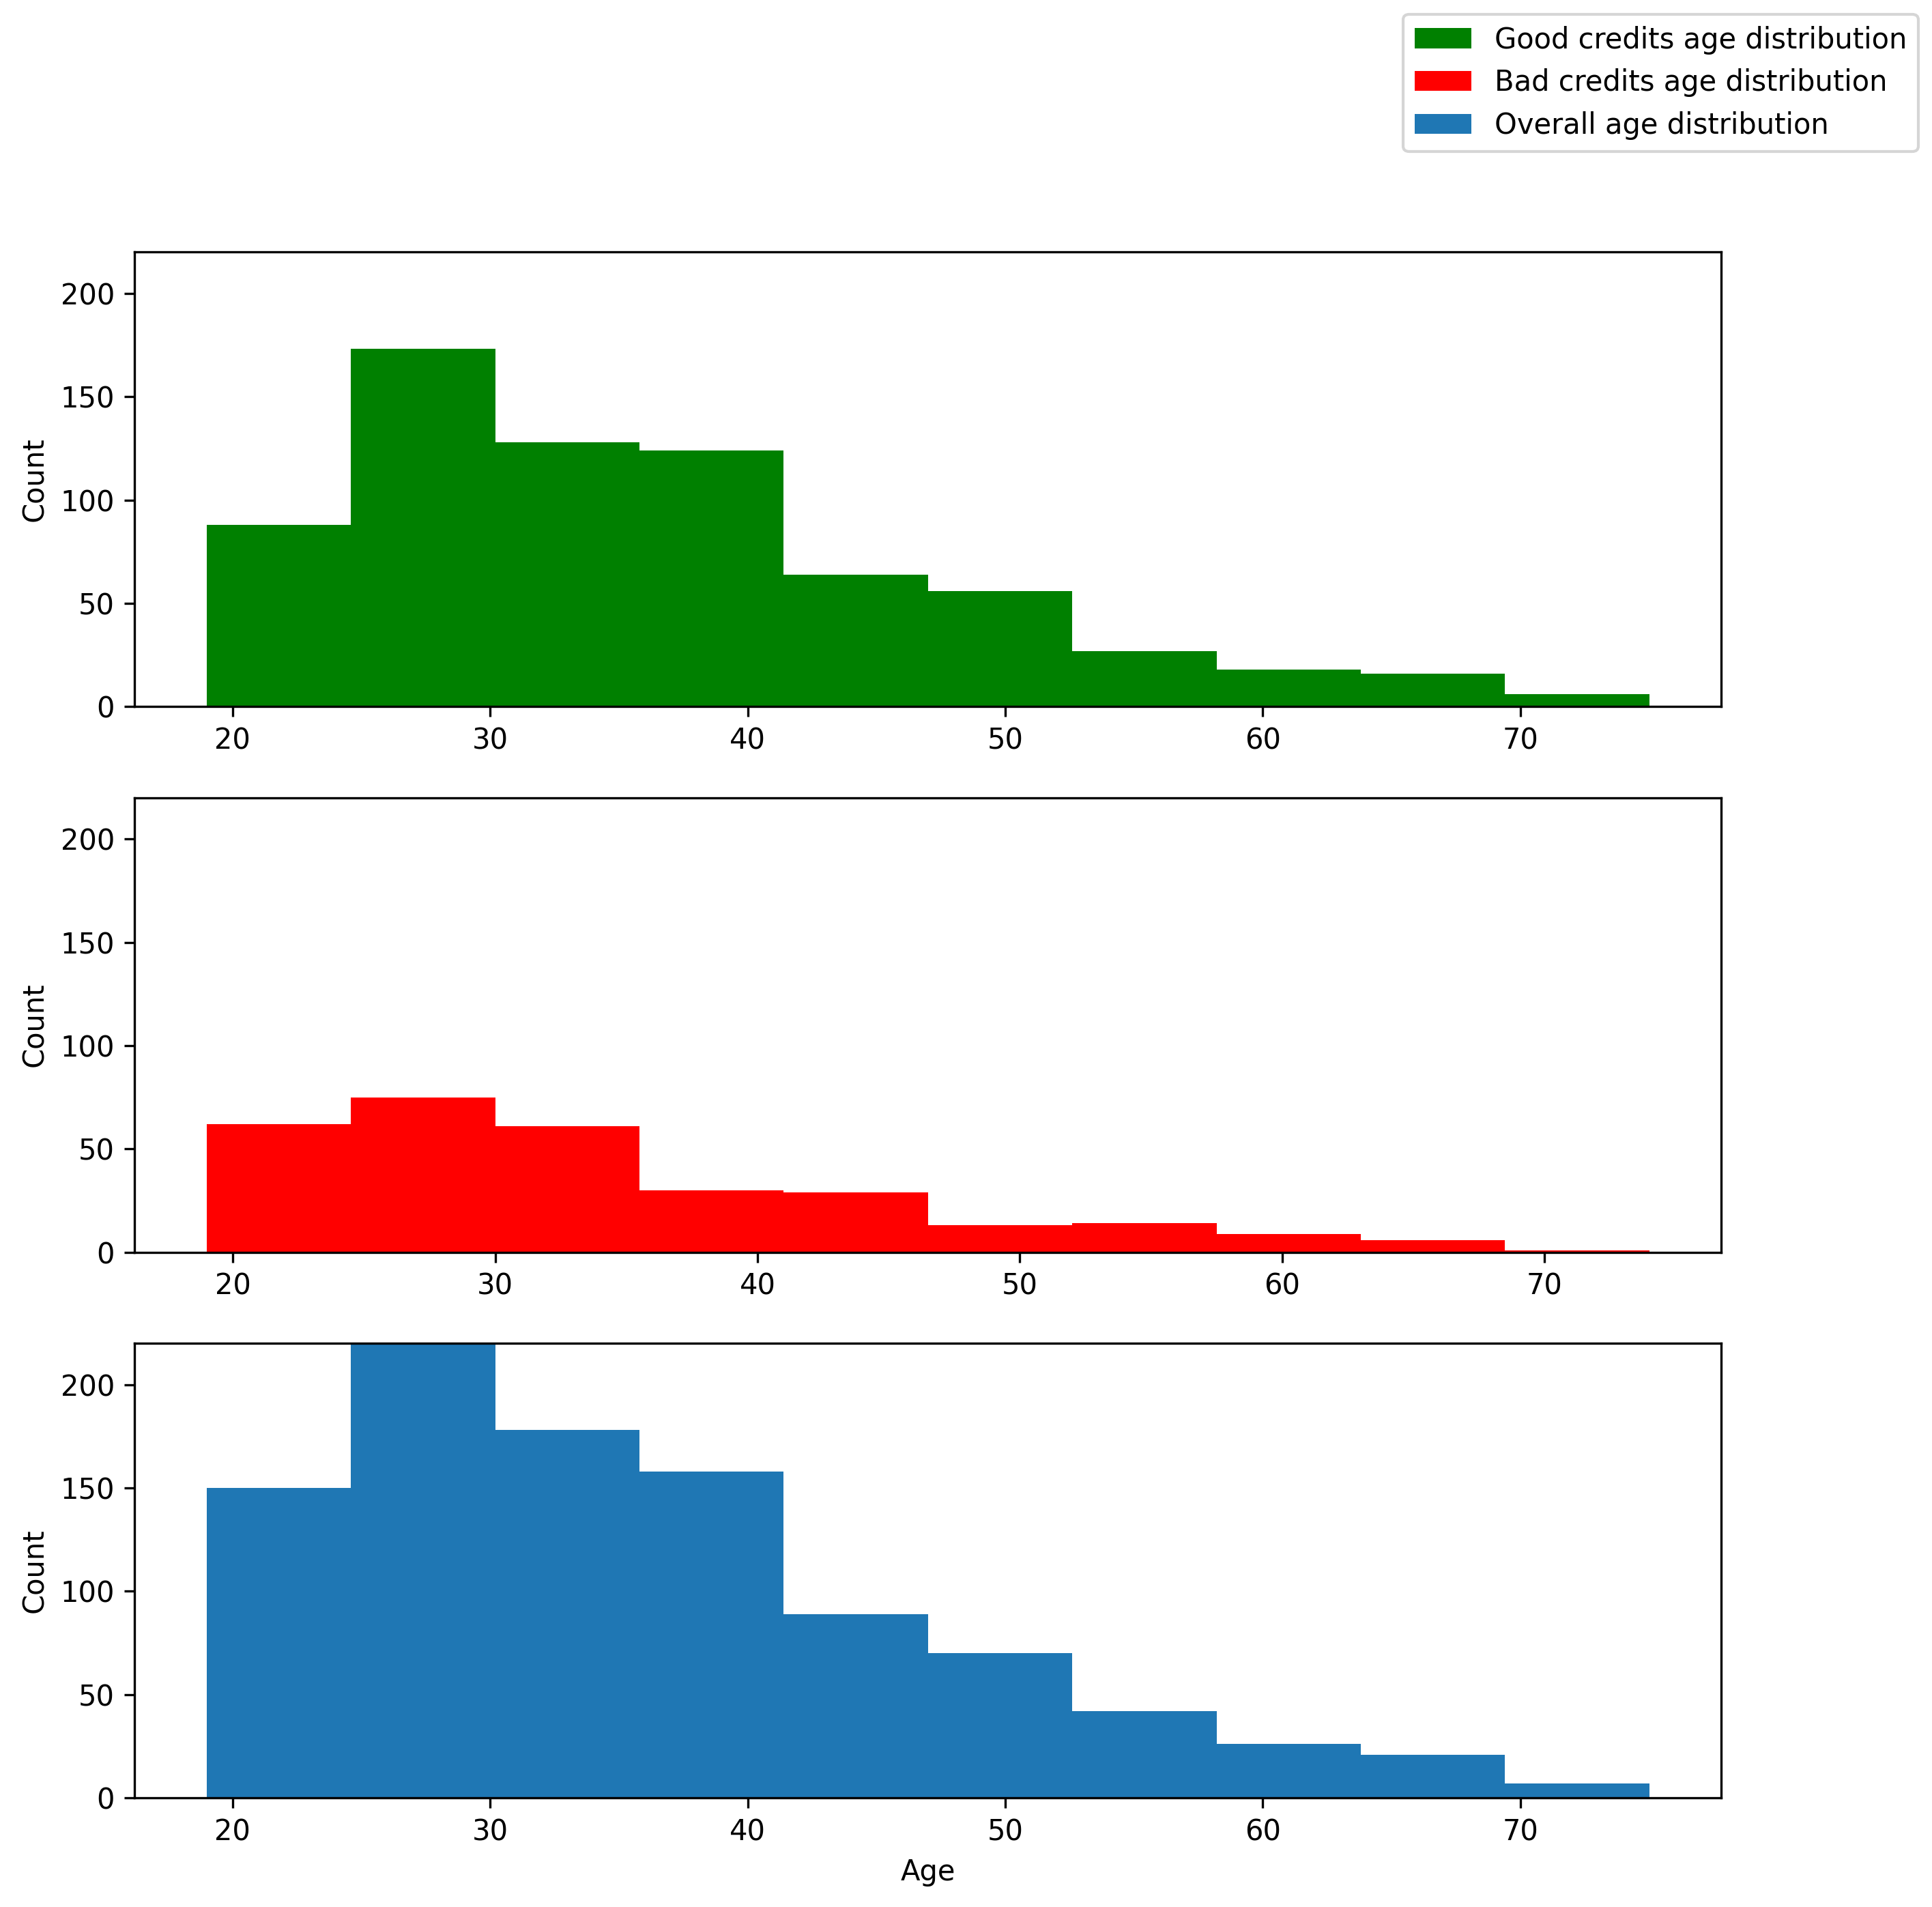

In [343]:
fig = plt.figure(figsize=(10, 10), dpi=300)
axes = fig.subplots(nrows=3, ncols=1)

axes[0].hist(data[data['credit_risk'] == 'good']['age'], color='g', label='Good credits age distribution')
axes[1].hist(data[data['credit_risk'] == 'bad']['age'], color='r', label='Bad credits age distribution')
axes[2].hist(data['age'], label='Overall age distribution')

lines, labels = [], []
for ax in axes:
    line, label = ax.get_legend_handles_labels()
    lines.extend(line)
    labels.extend(label)
    ax.set_ylim(0, 220)
    ax.set_ylabel('Count')    
fig.legend(lines, labels)
plt.xlabel('Age')

fig.show()

*Комментарий:* видим, что все 3 гистограммы имеют схожую структуру: пик около 30 лет и затем постоянное уменьшение

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

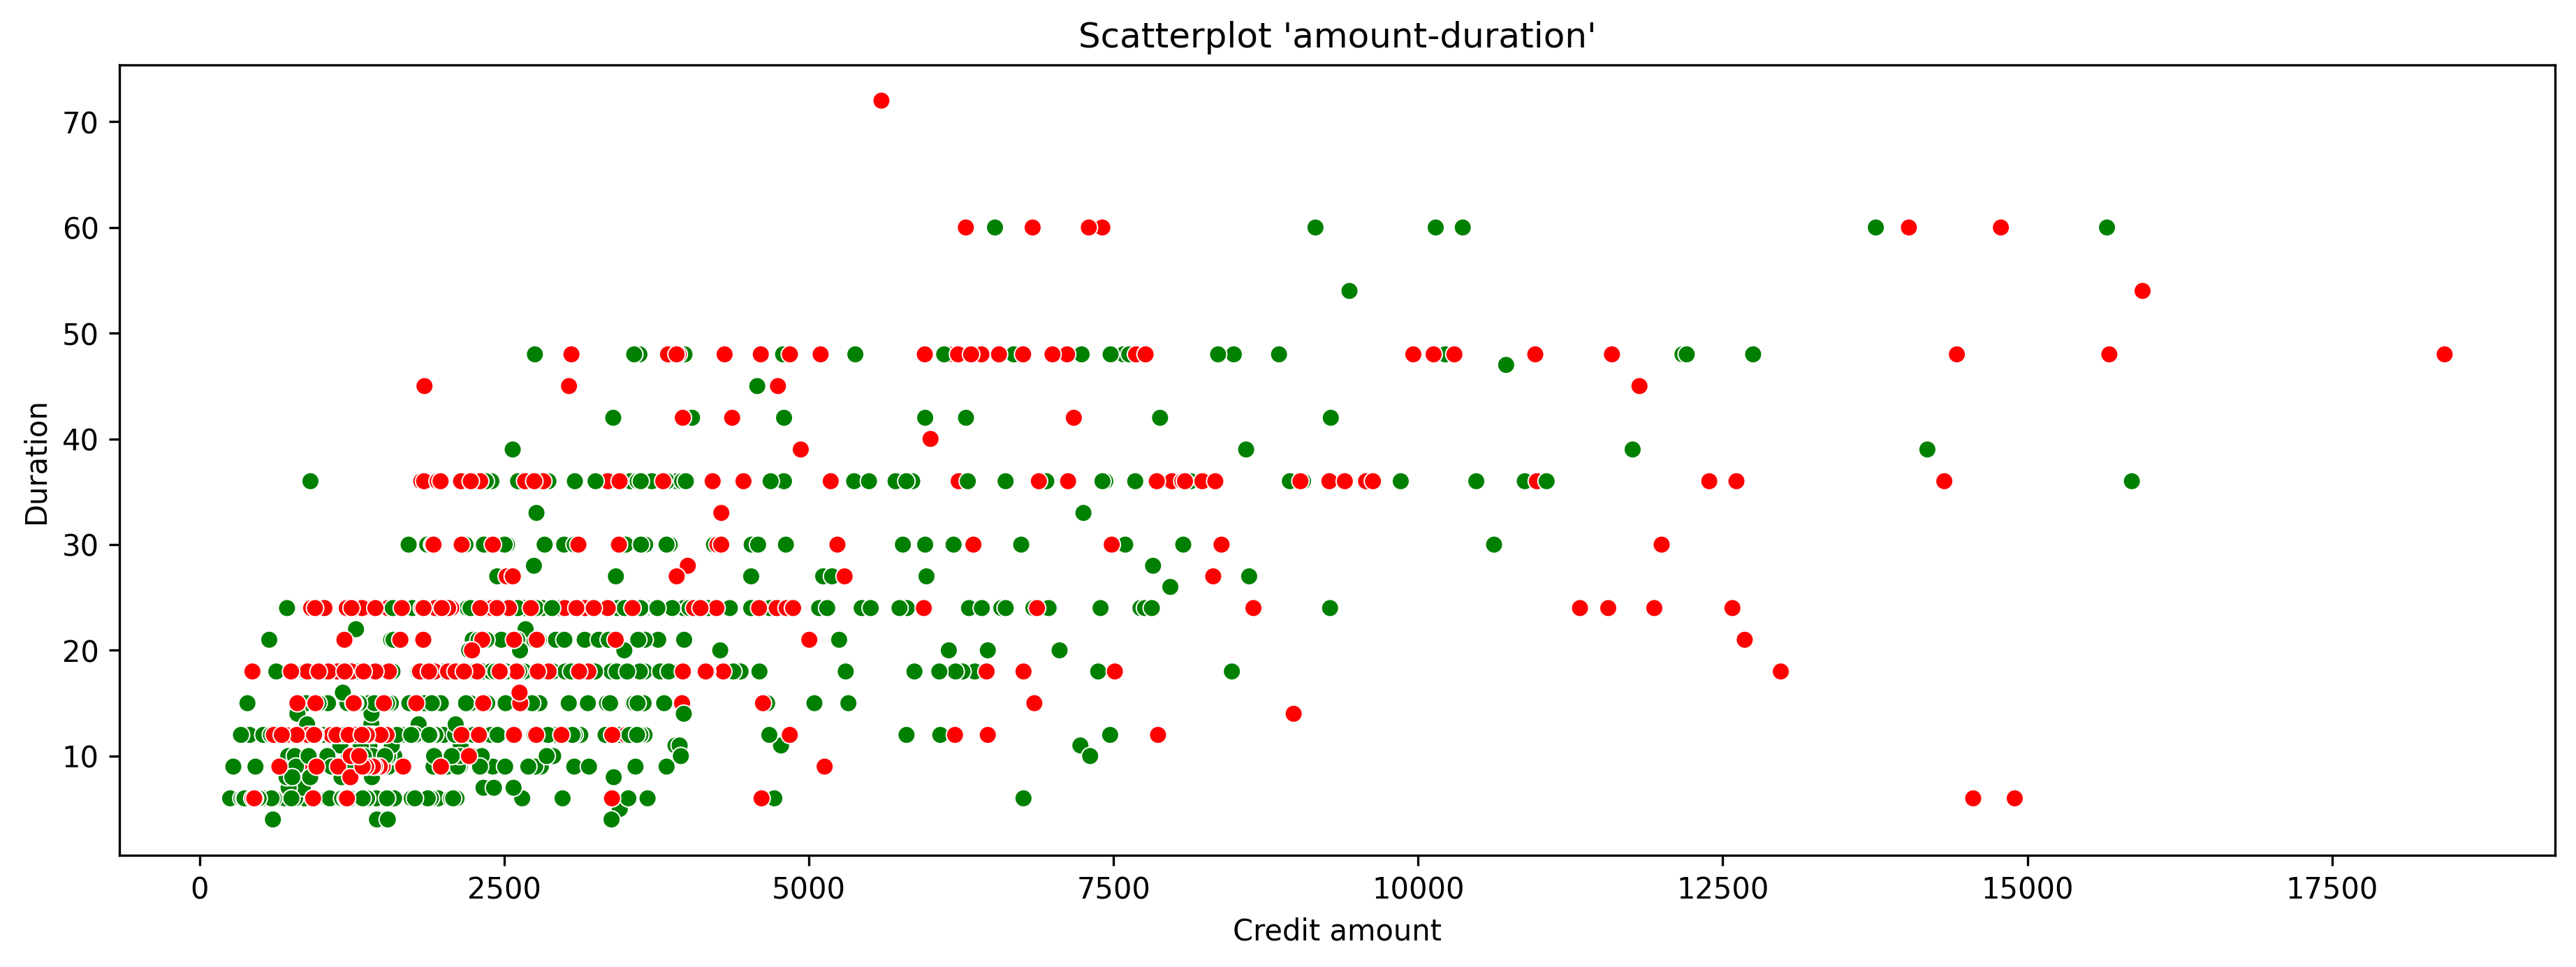

In [344]:
plt.figure(figsize=(15, 5), dpi=300)
plt.title("Scatterplot 'amount-duration'")
sns.scatterplot(data=data, x='amount', y='duration', hue='credit_risk', palette=sns.color_palette(['g', 'r']), legend=False)
plt.ylabel('Duration')
plt.xlabel('Credit amount')
plt.show()

*Комментарий:* четкой функциональной завиисмости между credit amount и duration нет; заметно небольшое количество выбросов; наибольшая плотность рассеивания в области с credit amount от 0 практически до 5000 и с duration почти до 30 

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

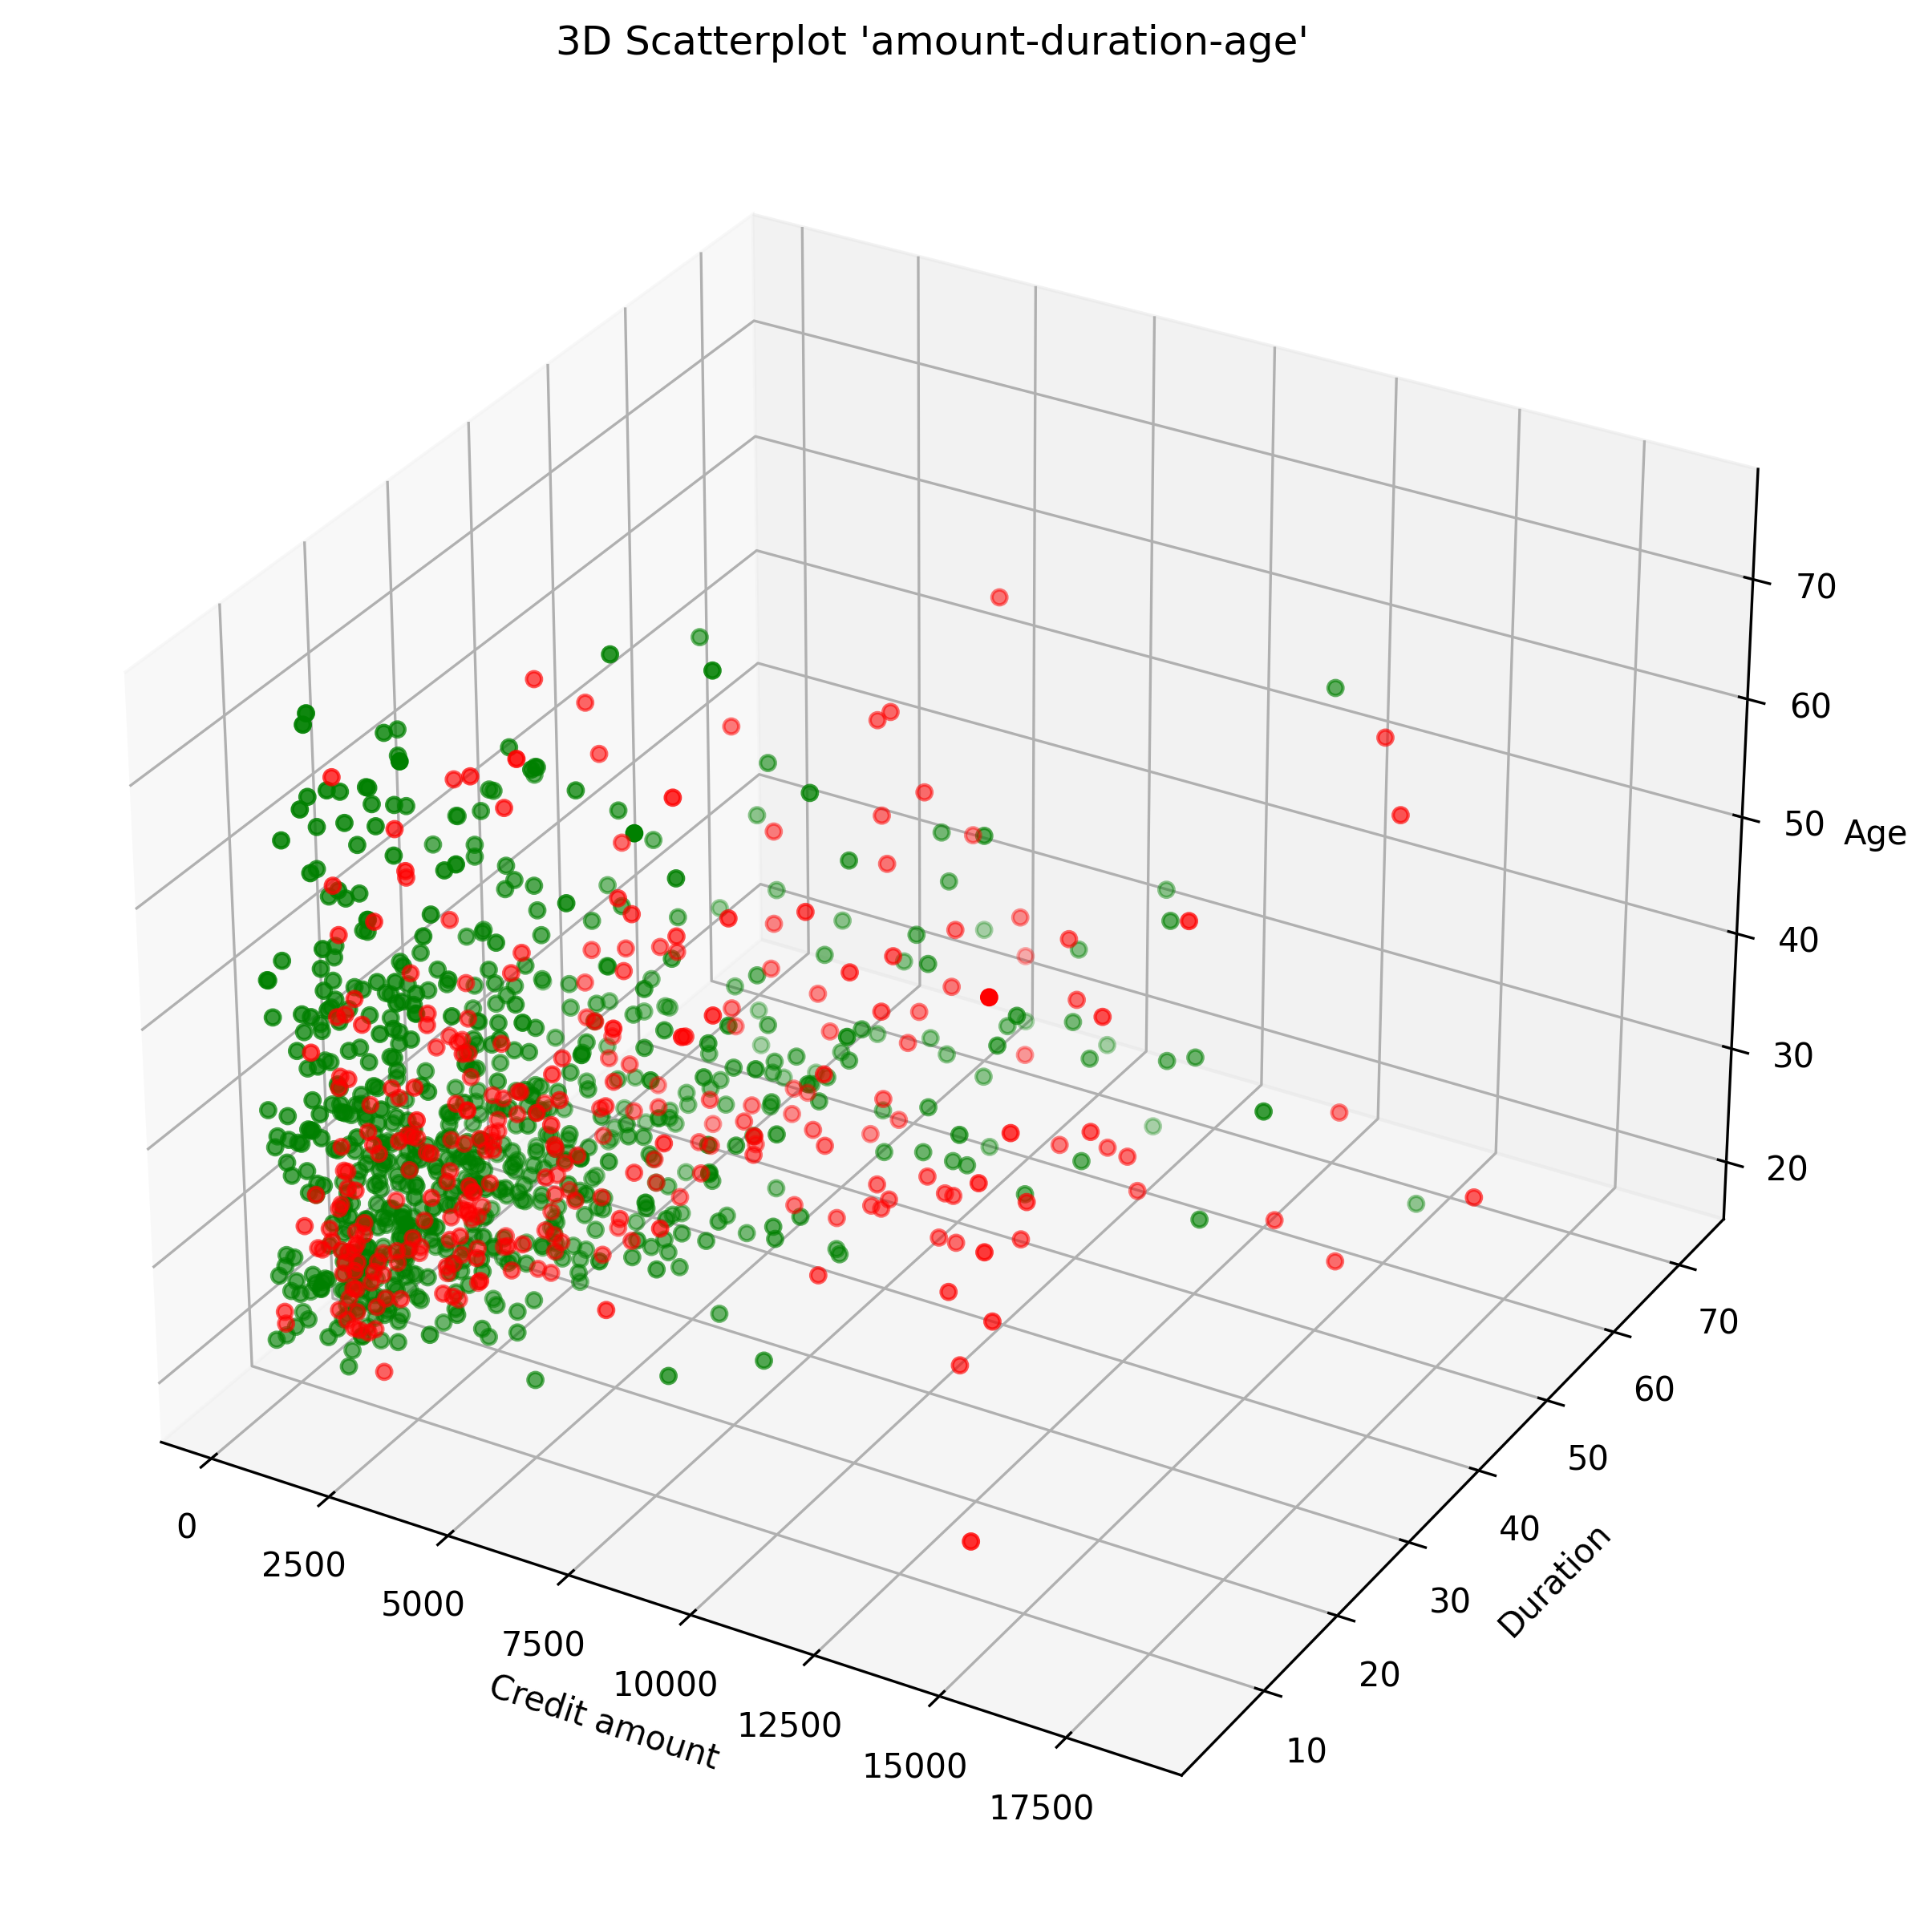

In [346]:
fig = plt.figure(figsize=(15, 10), dpi=300)
ax = fig.add_subplot(projection = '3d')
plt.title("3D Scatterplot 'amount-duration-age'")

ax.scatter(data[data.credit_risk=='good']['amount'], data[data.credit_risk=='good']['duration'], data[data.credit_risk=='good']['age'], c='g')
ax.scatter(data[data.credit_risk=='bad']['amount'], data[data.credit_risk=='bad']['duration'], data[data.credit_risk=='bad']['age'], c='r')

ax.set_xlabel('Credit amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Age')


plt.show()

*Комментарий:* четкой функциональной завиисмости нет; заметно небольшое количество выбросов; наибольшая плотность рассеивания в области с credit amount от 0 практически до 5000, с duration почти до 30 и с age почти до 40

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [299]:
data.drop(columns=['credit_history', 'purpose', 'other_debtors', 'personal_status_sex', 'property', 'housing', 'other_installment_plans', 'job'], inplace=True)

In [300]:
data['telephone_сode'] = (data['telephone'] == 'yes (under customer name)').astype(int)
data['foreign_worker_сode'] = (data['foreign_worker'] == 'yes').astype(int)
data['people_liable_сode'] = (data['people_liable'] == '3 or more').astype(int)

data['status_сode'] = data['status'].apply(lambda x: ['no checking account', '... < 0 DM', '0<= ... < 200 DM', '... >= 200 DM / salary for at least 1 year'].index(x))
data['savings_сode'] = data['savings'].apply(lambda x: ['unknown/no savings account', '... <  100 DM', '100 <= ... <  500 DM', '500 <= ... < 1000 DM', '... >= 1000 DM'].index(x))
data['employment_duration_сode'] = data['employment_duration'].apply(lambda x: ['unemployed', '< 1 yr', '1 <= ... < 4 yrs', '4 <= ... < 7 yrs', '>= 7 yrs'].index(x))
data['installment_rate_сode'] = data['installment_rate'].apply(lambda x: ['< 20', '20 <= ... < 25', '25 <= ... < 35', '>= 35'].index(x))
data['present_residence_сode'] = data['present_residence'].apply(lambda x: ['< 1 yr', '1 <= ... < 4 yrs', '4 <= ... < 7 yrs', '>= 7 yrs'].index(x))
data['number_credits_сode'] = data['number_credits'].apply(lambda x: ['1', '2-3', '4-5', '>= 6'].index(x))

data['credit_risk'] = (data['credit_risk'] == 'good').astype(int) # чтобы удобнее было в 14 номере
data = data[[x for x in data.columns if x != 'credit_risk'] + ['credit_risk']]

In [301]:
data.drop(columns=['telephone', 'foreign_worker', 'people_liable', 'status', 'savings', 'employment_duration', 'installment_rate', 'present_residence', 'number_credits'], inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [302]:
data.sample(5)

,duration,amount,age,telephone_сode,foreign_worker_сode,people_liable_сode,status_сode,savings_сode,employment_duration_сode,installment_rate_сode,present_residence_сode,number_credits_сode,credit_risk
770,24,1823,30,0,0,1,0,0,0,0,1,0,0
789,24,4736,25,0,0,0,1,0,1,2,3,0,0
502,6,1595,51,0,0,1,3,0,3,1,1,0,1
120,36,4795,30,1,0,0,1,0,1,0,0,0,1
732,15,3368,23,1,0,0,3,3,4,1,3,1,1


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

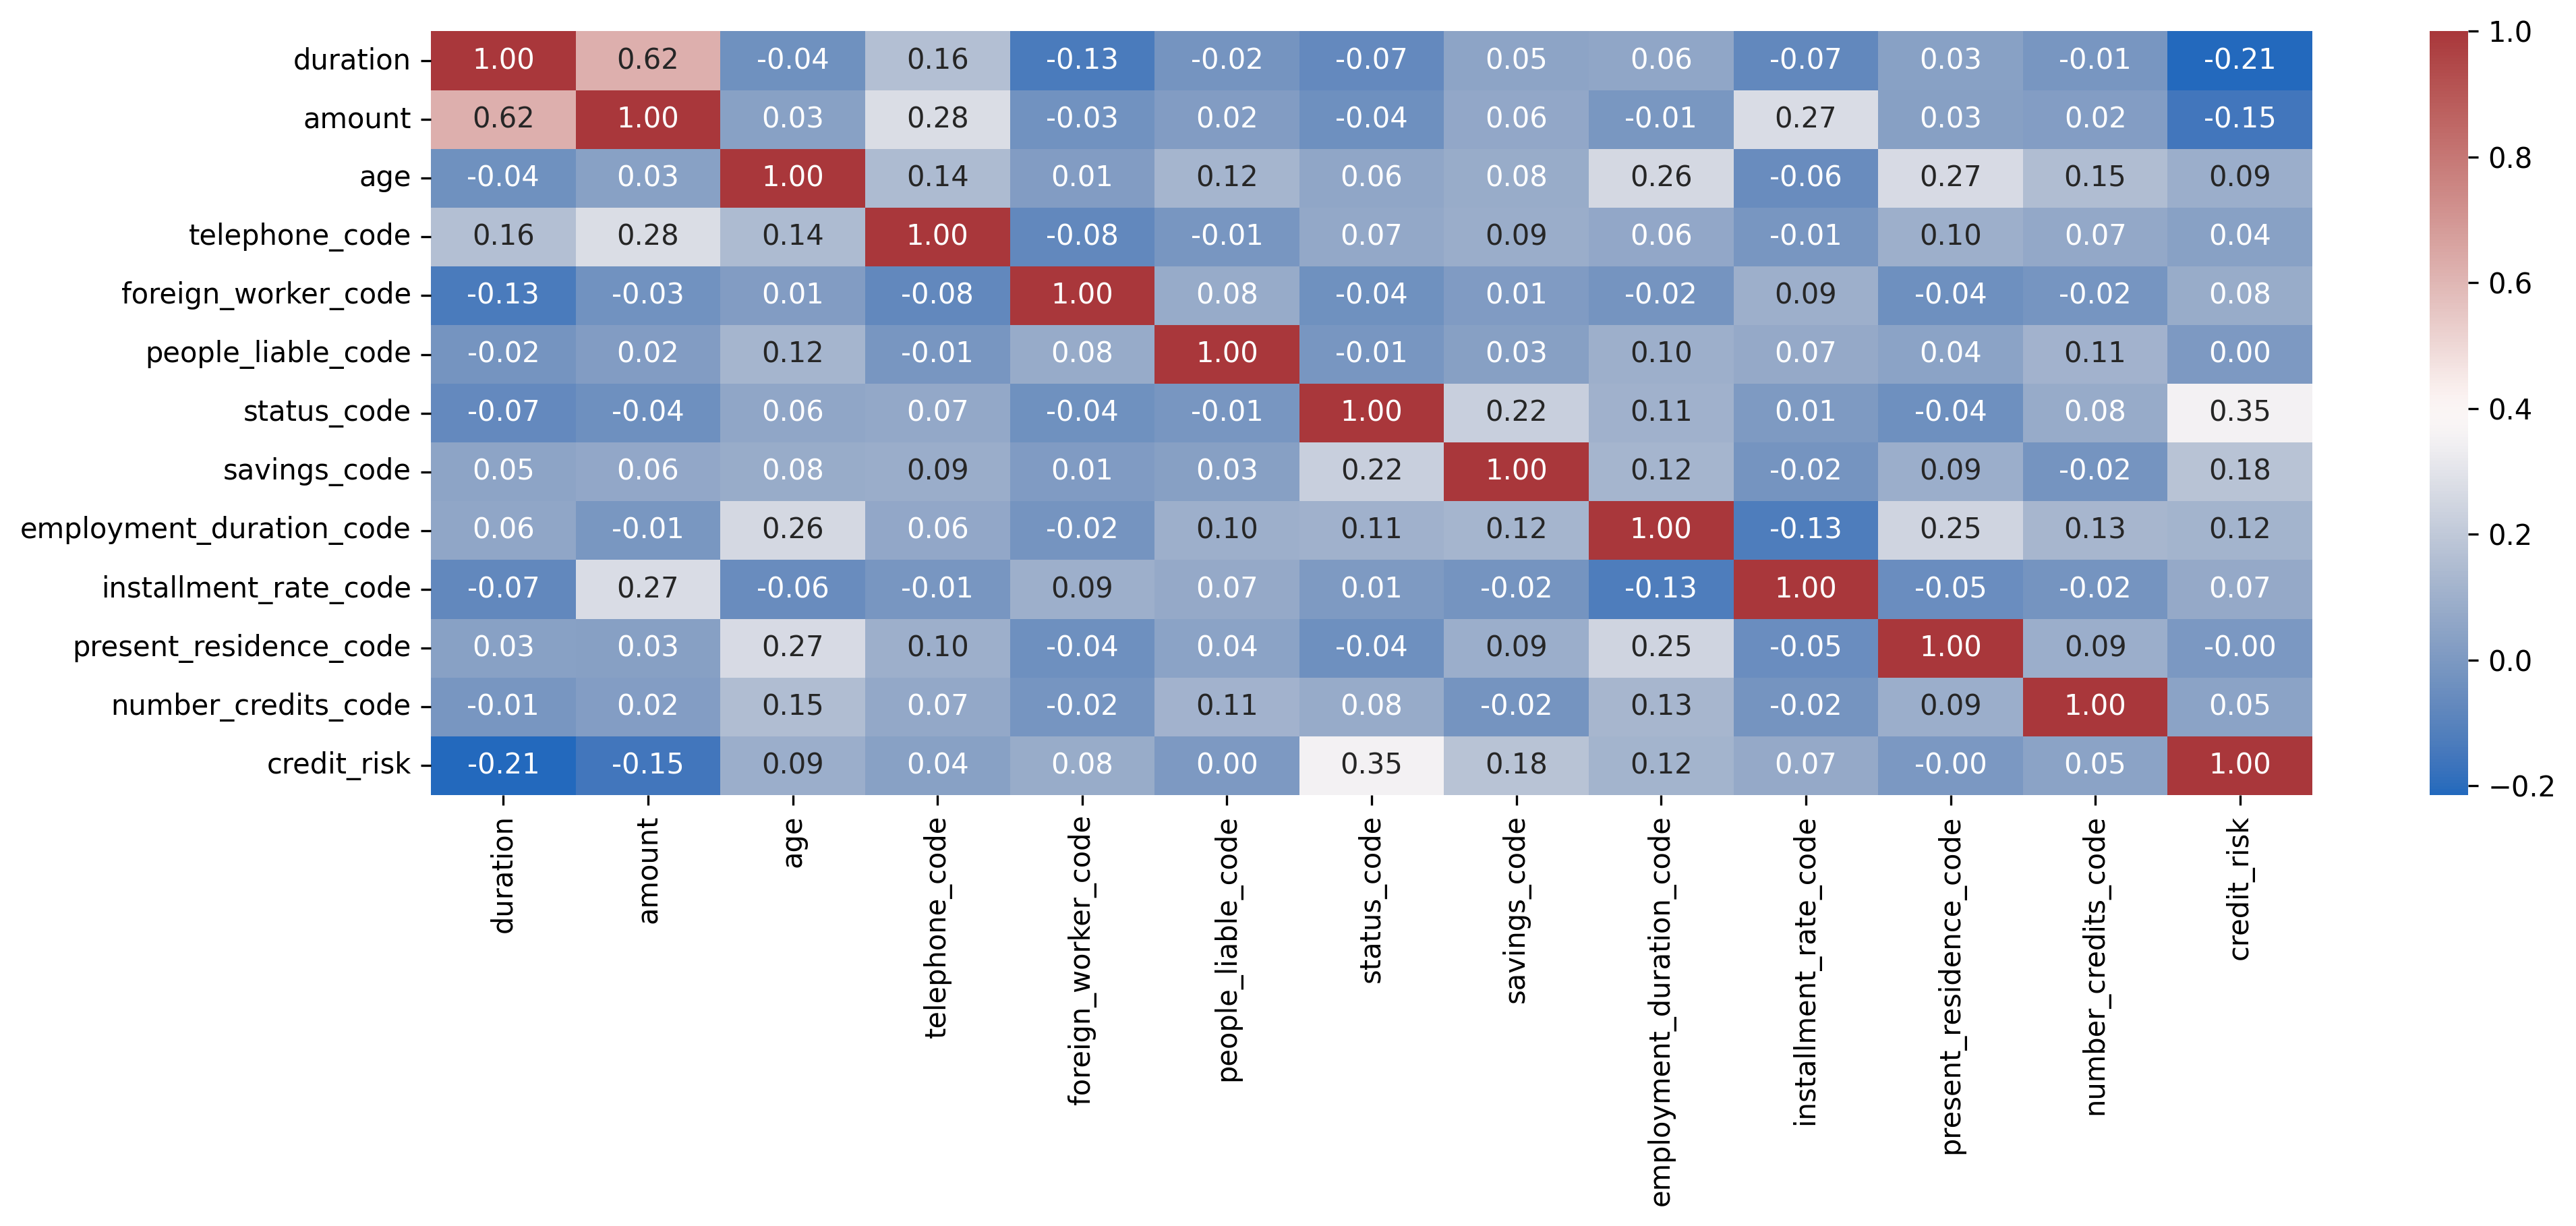

In [303]:
plt.figure(figsize=(15, 5), dpi=300)
sns.heatmap(data.corr(), cmap='vlag', annot=True, fmt='0.2f');

Выделим самые большие корреляции с целевой переменной: *duration*, *amount*, *status_code*, *savings_code*, *employment_duration_code*

Пусть реализуем предсказание следующим образом: для каждого объекта к начальной нулевой сумме будем прибавлять 1, если значение признака удовлетворяет некоторому условию, выведенному ниже, при котором кредит будет скорее возвращен, вычитать 1 в противном случае; в качестве ответа возьмем знак получившейся суммы (он будет показывать, больше признаков удовлетворяет условию или нет)

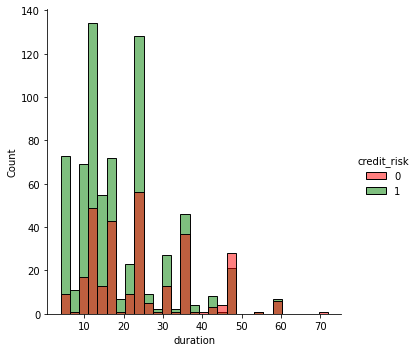

In [304]:
sns.displot(data, x='duration', hue='credit_risk', palette=sns.color_palette(['r', 'g']))

Смотря на график, пусть, если *duration* < 45, то +1, иначе -1 

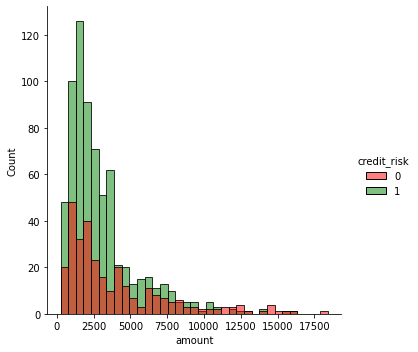

In [305]:
sns.displot(data, x='amount', hue='credit_risk', palette=sns.color_palette(['r', 'g']))

Смотря на график, пусть, если *amount* <= 11000, то +1, иначе -1

<AxesSubplot:xlabel='status_сode', ylabel='Count'>

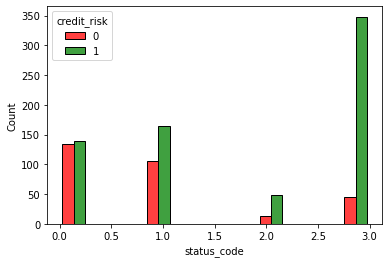

In [306]:
sns.histplot(data, x='status_сode', hue='credit_risk', multiple='dodge', shrink=.8, palette=sns.color_palette(['r', 'g']))

Смотря на график, пусть, если *status_сode* != 0, то +1, иначе -1

<AxesSubplot:xlabel='savings_сode', ylabel='Count'>

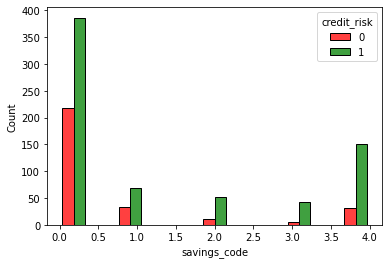

In [307]:
sns.histplot(data, x='savings_сode', hue='credit_risk', multiple='dodge', shrink=.8, palette=sns.color_palette(['r', 'g']))

Смотря на график, пусть всегда +1

<AxesSubplot:xlabel='employment_duration_сode', ylabel='Count'>

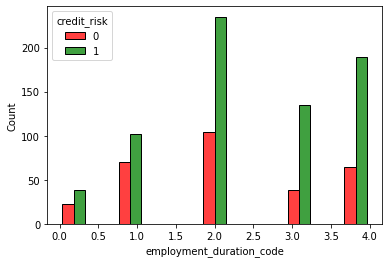

In [308]:
sns.histplot(data, x='employment_duration_сode', hue='credit_risk', multiple='dodge', shrink=.8, palette=sns.color_palette(['r', 'g']))

Смотря на график, пусть всегда +1

In [309]:
def predict(Xtest: np.array) -> np.array:
    pred = np.full(Xtest.shape[0], 2) # 2 - это те 2 признака, которые всегда дают +1 
    for i in range(Xtest.shape[0]):
      pred[i] += (1 if (Xtest[i][0] < 45) else -1) + (1 if (Xtest[i][1] <= 11000) else -1) + (1 if (Xtest[i][6] != 0) else -1)
    return pred > 0

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
print(f"Точность на обучающей выборке: {accuracy_score(y_test, predict(X_test))}")
print(f"Точность на тренировочной выборке: {accuracy_score(y_train, predict(X_train))}")

Точность на обучающей выборке: 0.66
Точность на тренировочной выборке: 0.7146666666666667


<ipython-input-309-6c5410508304>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = data.drop('credit_risk', 1).values
